In [1]:
!pip install pycaret --upgrade
!pip install dabl --upgrade
!pip install shap --upgrade
!pip install sdv --upgrade
!pip install sdv[ctgan] --upgrade
!pip install baytune --upgrade

     |████████████████████████████████| 256kB 8.2MB/s 
     |████████████████████████████████| 1.6MB 8.1MB/s 
     |████████████████████████████████| 6.8MB 28.2MB/s 
     |████████████████████████████████| 1.8MB 58.2MB/s 
     |████████████████████████████████| 266kB 54.0MB/s 
     |████████████████████████████████| 276kB 58.4MB/s 
     |████████████████████████████████| 66.3MB 45kB/s 
     |████████████████████████████████| 157.5MB 76kB/s 
     |████████████████████████████████| 13.9MB 256kB/s 
     |████████████████████████████████| 102kB 15.0MB/s 
     |████████████████████████████████| 174kB 56.1MB/s 
     |████████████████████████████████| 3.1MB 55.6MB/s 
     |████████████████████████████████| 604kB 47.8MB/s 
     |████████████████████████████████| 71kB 11.3MB/s 
     |████████████████████████████████| 71kB 11.0MB/s 
     |████████████████████████████████| 61kB 9.1MB/s 
     |████████████████████████████████| 337kB 51.0MB/s 
     |████████████████████████████████| 1.1MB 55.7MB/s 

Requirement already up-to-date: sdv[ctgan] in /usr/local/lib/python3.6/dist-packages (0.5.0)
     |████████████████████████████████| 51kB 4.5MB/s 
     |████████████████████████████████| 10.1MB 9.6MB/s 
     |████████████████████████████████| 71kB 10.7MB/s 
     |████████████████████████████████| 7.1MB 57.7MB/s 
ERROR: xarray 0.15.1 has requirement pandas>=0.25, but you'll have pandas 0.24.2 which is incompatible.
ERROR: visions 0.5.0 has requirement pandas>=0.25.3, but you'll have pandas 0.24.2 which is incompatible.
ERROR: sdv 0.5.0 has requirement pandas<2,>=1.1, but you'll have pandas 0.24.2 which is incompatible.
ERROR: rdt 0.2.9 has requirement pandas<2,>=1.1, but you'll have pandas 0.24.2 which is incompatible.
ERROR: pyod 0.8.4 has requirement pandas>=0.25, but you'll have pandas 0.24.2 which is incompatible.
ERROR: pycaret 2.2.2 has requirement scikit-learn>=0.23.2, but you'll have scikit-learn 0.22.2.post1 which is incompatible.
ERROR: plotnine 0.6.0 has requirement pandas>=0

# **Will they stay or will they go? Predicting employee attrition and improving models with synthetic data**
---

## **Why this was done**
1. Learn about synthetic data generation and see if it can improve a model
2. Work with PyCaret on a classification problem
3. Provide interpretation of the model(s) used
4. Work on an HR related problem

## **The data**
HR data isn't easy to find given the nature of the data. However [IBM has created fictious data](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) which can be used. The features for each employee are...

* ` Age `
* ` Attrition `
* ` BusinessTravel `
* ` DailyRate `
* ` Department `
* ` DistanceFromHome `
* ` Education `
* ` EducationField `
* ` EmployeeCount `
* ` EmployeeNumber `
* ` EnvironmentSatisfaction `
* ` Gender `
* ` HourlyRate `
* ` JobInvolvement `
* ` JobLevel `
* ` JobRole `
* ` JobSatisfaction `
* ` MaritalStatus `
* ` MonthlyIncome `
* ` MonthlyRate `
* ` NumCompaniesWorked `
* ` Over18 `
* ` OverTime `
* ` PercentSalaryHike `
* ` PerformanceRating `
* ` RelationshipSatisfaction `
* ` StandardHours `
* ` StockOptionLevel `
* ` TotalWorkingYears `
* ` TrainingTimesLastYear `
* ` WorkLifeBalance `
* ` YearsAtCompany `
* ` YearsInCurrentRole `
* ` YearsSinceLastPromotion `
* ` YearsWithCurrManager `

# **Libraries**

In [2]:
from pycaret.classification import * # Preprocessing, modelling, interpretation, deployment...
import pandas as pd # Basic data manipulation
import dabl as db # Summary plot
from sklearn.model_selection import train_test_split # Data split
from sdv.tabular import CopulaGAN # Synthetic data
from sdv.evaluation import evaluate # Evaluate synthetic data
from btb.tuning import Tunable, GCPTuner # CopulaGAN optimising
from btb.tuning import hyperparams as hp  # Set hyperparameters for optimising

# **Prepping data and preprocessing**

In [3]:
hr_data = pd.read_csv("HR Employee Attrition.csv")

In [4]:
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# **Visualising**
The main problem with this dataset is there is a large class imbalance for the target feature. I will model the data with the imbalance to see how it performs but there will be a way to improve it, synthetic data.

The other features look somewhat normal except for `StandardHours` and `EmployeeCount` which have zero variance hence will be ignored.

Target looks like classification
Linear Discriminant Analysis training set score: 0.500


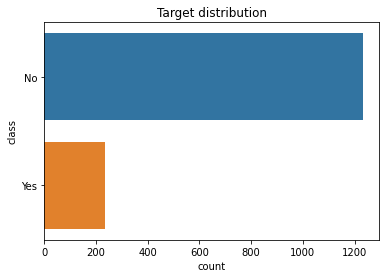

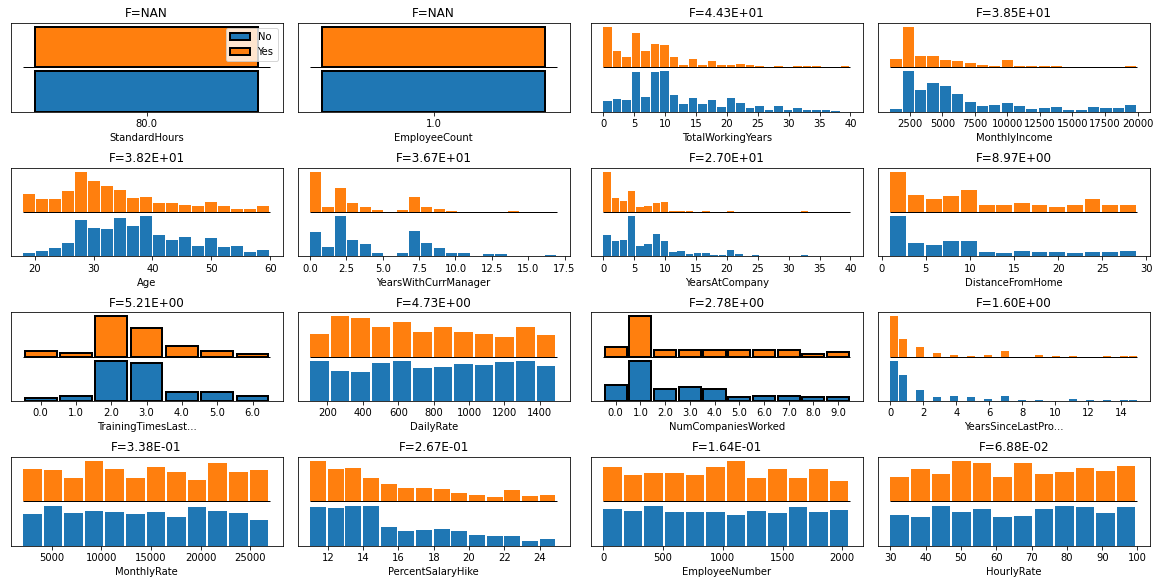

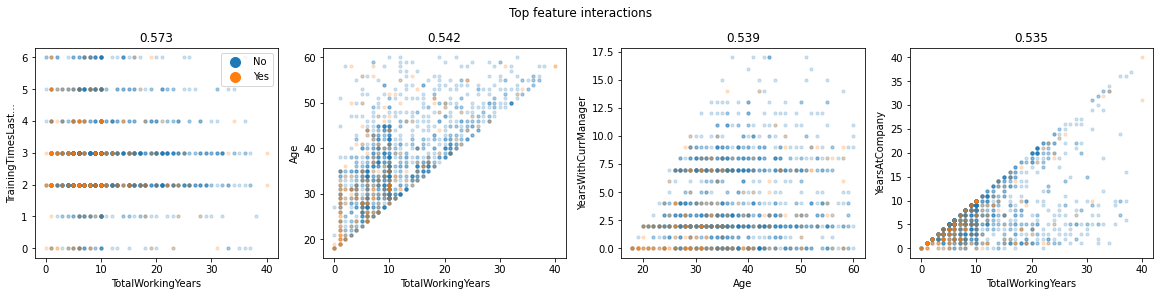

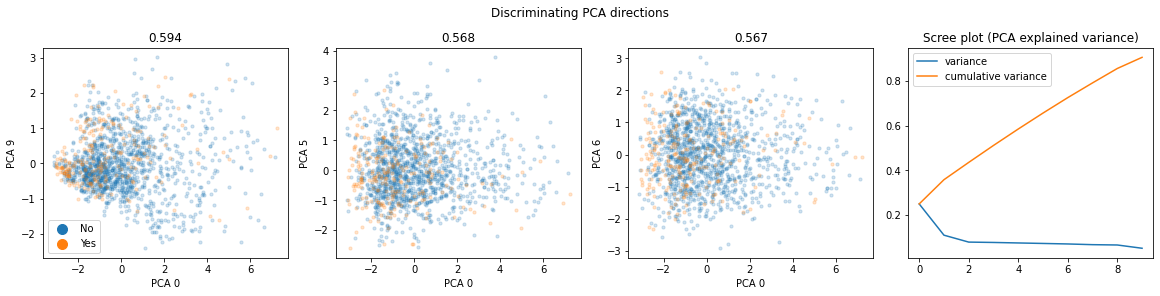

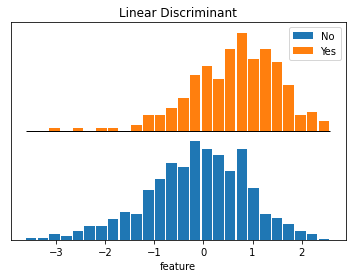

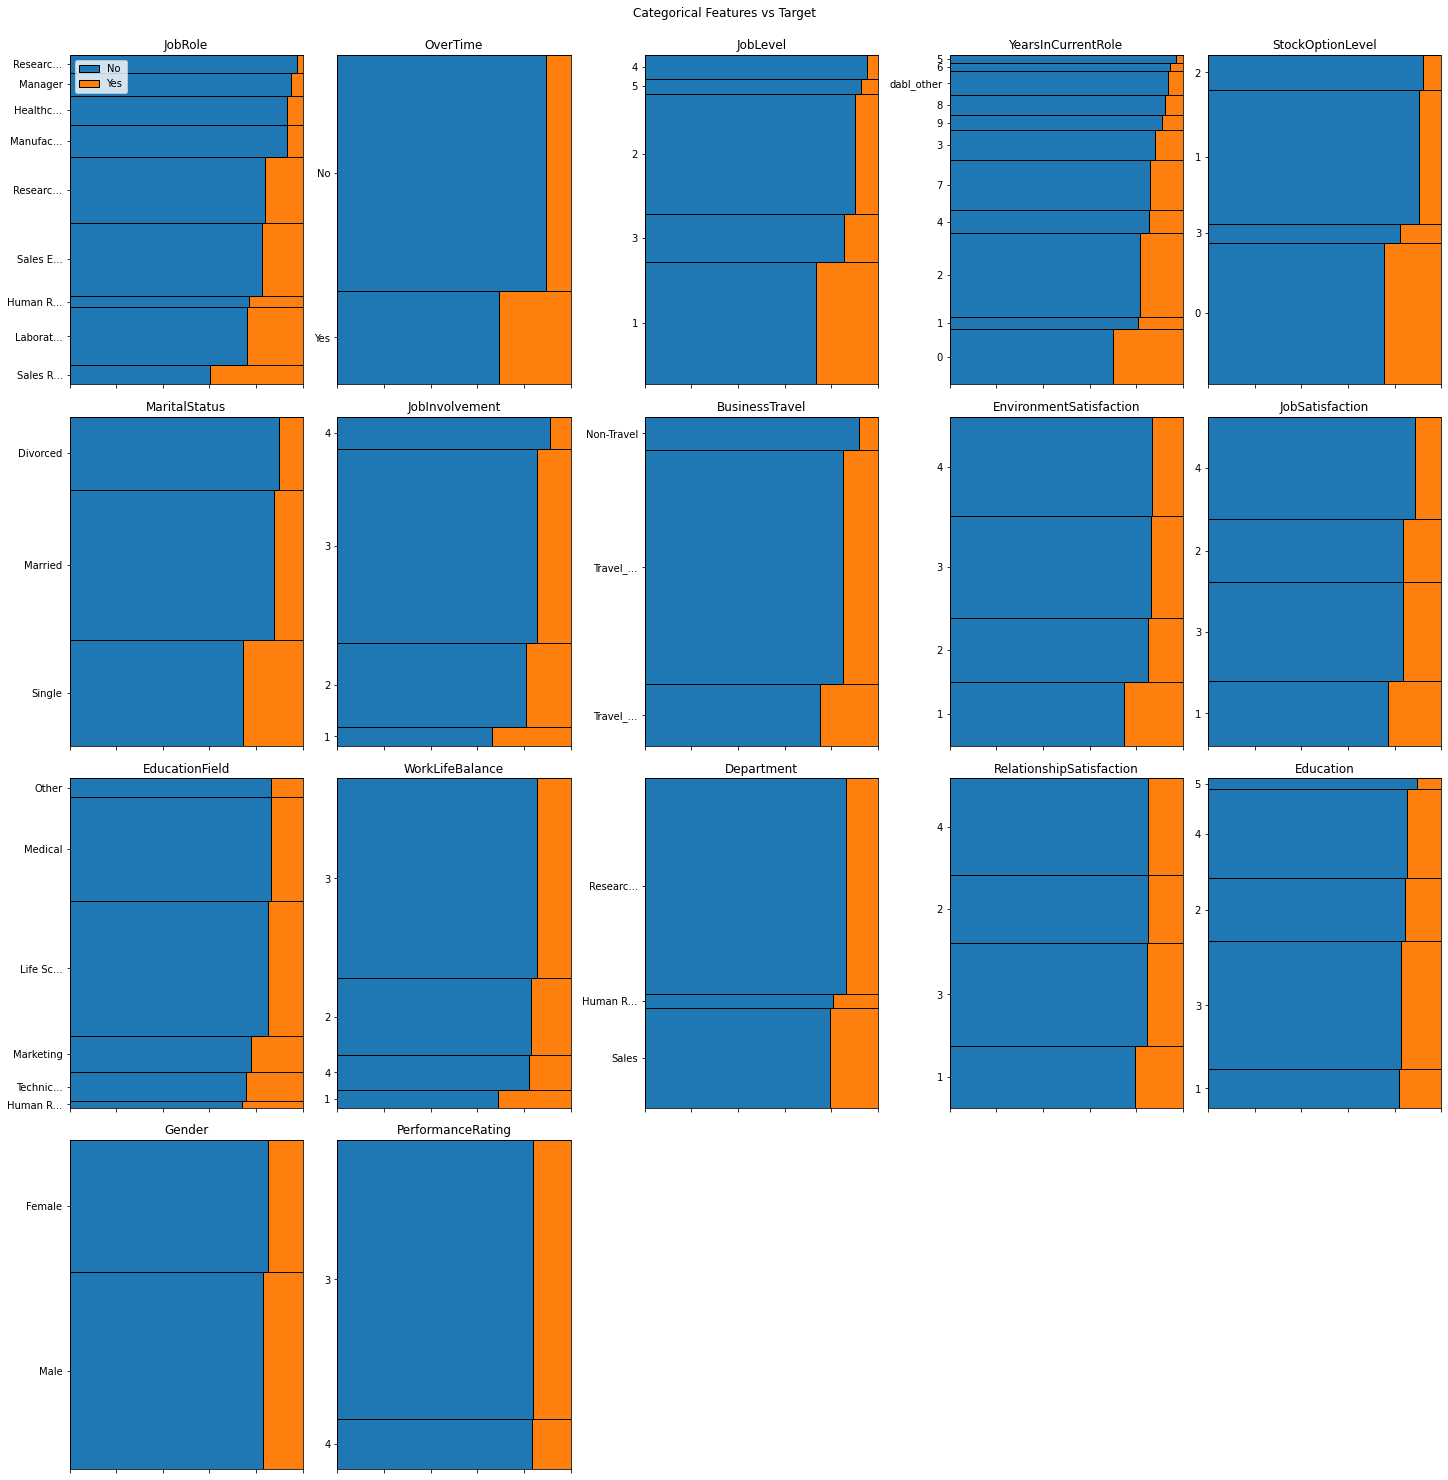

In [5]:
# Plot summaries of continuous + categorical features
## Type hints are used to force types on certain features
types = {"DistanceFromHome" : "continuous", "EmployeeCount" : "continuous",
         "HourlyRate" : "continuous", "MonthlyRate" : "continuous", 
         "NumCompaniesWorked" : "continuous", "PercentSalaryHike" : "continuous",
         "StandardHours" : "continuous", "TotalWorkingYears" : "continuous", 
         "YearsAtCompany" : "continuous", "YearsSinceLastPromotion" : "continuous",
         "YearsWithCurrManager" : "continuous", "TrainingTimesLastYear" : "continuous",
         "Age" : "continuous", "DailyRate" : "continuous", "MonthlyIncome" : "continuous"}

db.plot(hr_data, y = "Attrition", type_hints = types)

# **First modelling w/original data**

# **Second modelling w/original + synthetic data**

In [ ]:
tuner = GCPTuner(Tunable({
          'epochs': hp.IntHyperParam(min = 25, max = 400),
          'batch_size' : hp.IntHyperParam(min = 1, max = 100, include_min = True, include_max = True),
          'embedding_dim' : hp.IntHyperParam(min = 1, max = 200, include_min = True, include_max = True),
          'gen' : hp.IntHyperParam(min = 1, max = 500),
          'dim_gen' : hp.IntHyperParam(min = 1, max = 500)
        }))

In [ ]:
best_score = 0

real = hr_data[hr_data["Attrition"] == "Yes"]

for _ in range(50):
  proposal = tuner.propose(1)
  print(proposal)
  model = CopulaGAN(embedding_dim = proposal['embedding_dim'],
                    gen_dim = (proposal['gen'], proposal['gen']),
                    dis_dim = (proposal['dim_gen'], proposal['dim_gen']),
                    batch_size = proposal['batch_size'] * 10,
                    epochs = proposal['epochs'],
                    primary_key = "EmployeeNumber", 
                    field_transformers = {"BusinessTravel" : "categorical",
                                          "EducationField" : "categorical",
                                          "Department" : "categorical",
                                          "MaritalStatus" : "categorical",
                                          "JobRole" : "categorical",
                                          "Gender" : "categorical",
                                          "Over18" : "categorical",
                                          "OverTime" : "categorical"})
  model.fit(real)
  synth_data = model.sample(600, max_retries = 300)
  score = evaluate(synthetic_data = synth_data, real_data = real)
  print(score)
  if score > best_score:
    best_params = proposal
    best_score = score
        
  tuner.record(proposal, score)
    
print('Best score obtained: ', best_score)
print('Best parameters: ', best_params)

In [ ]:
{'epochs': 154, 'batch_size': 78, 'embedding_dim': 11, 'gen': 29, 'dim_gen': 237}

In [ ]:
# Create different features to feed into pycaret setup
target = "Attrition"

cont_feats = ["DistanceFromHome", "HourlyRate",  "DailyRate", "MonthlyIncome",
              "MonthlyRate", "NumCompaniesWorked", "PercentSalaryHike",
              "TotalWorkingYears", "YearsAtCompany",
              "YearsWithCurrManager", "TrainingTimesLastYear", "YearsSinceLastPromotion"]

ord_feats = {"StockOptionLevel" : ["0", "1", "2", "3", "4"],
             "EnvironmentSatisfaction" : ["0", "1", "2", "3", "4"],
             "JobInvolvement" : ["1", "2", "3", "4"],
             "JobSatisfaction" : ["0", "1", "2", "3", "4", "5"],
             "Education" : ["1", "2", "3", "4", "5"],
             "PerformanceRating" : ["3", "4", "5"],
             "RelationshipSatisfaction" : ["0", "1", "2", "3", "4", "5"],
             "WorkLifeBalance" : ["1", "2", "3", "4"]}

cat_feats = ["BusinessTravel", "Department", "EducationField", "JobRole",
             "Gender", "JobLevel", "JobRole", "Over18",
             "MaritalStatus", "OverTime", "WorkLifeBalance"]

ignore = ["EmployeeNumber", "StandardHours", "EmployeeCount"]

In [ ]:
for feat in list(ord_feats.keys()):
  print(input[feat].unique())

[3 2 0 1 4]
[3 1 4 2 0]
[3 1 4 2]
[2 3 4 1 0 5]
[2 4 1 3 5]
[3 4 5]
[3 2 4 1 5 0]
[2 4 3 1]


In [ ]:
# Insert synthetic data into real dataset and randomly split it
hr_data["dataset"] = "real"
synth_data["dataset"] = "synth"

full_data = pd.concat([hr_data, synth_data])

X_train, X_test, y_train, y_test = train_test_split(hr_data.drop("Attrition", axis = 1), hr_data["Attrition"], test_size=0.33, random_state=42)

X_train["Attrition"] = y_train
X_test["Attrition"] = y_test

input = pd.concat([X_train, synth_data]).drop("dataset", axis = 1)
test = X_test.drop("dataset", axis = 1)

In [ ]:
# Run pycaret setup
setup(input, 
      target = target, 
      test_data = test,
      transformation = True,
      train_size = 0.7, pca = True,
      numeric_features = cont_feats,
      categorical_features = cat_feats,
      ordinal_features = ord_feats,
      ignore_features = ignore,
      normalize = True,
      normalize_method = "robust",
      data_split_stratify = True,
      ignore_low_variance = True,
      silent = True)

In [ ]:
compare_models(sort = "AUC")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8777,0.9448,0.8298,0.9123,0.8431,0.7527,0.7719,9.325
et,Extra Trees Classifier,0.8853,0.9441,0.8246,0.9285,0.8451,0.7676,0.7873,0.497
qda,Quadratic Discriminant Analysis,0.8715,0.9424,0.8441,0.8744,0.8368,0.7402,0.7559,0.016
xgboost,Extreme Gradient Boosting,0.8708,0.9420,0.8324,0.8852,0.8375,0.7389,0.7534,5.146
gbc,Gradient Boosting Classifier,0.8702,0.9399,0.8233,0.8957,0.8345,0.7375,0.7543,1.158
lightgbm,Light Gradient Boosting Machine,0.8777,0.9387,0.8323,0.8995,0.8449,0.7528,0.7672,0.391
rf,Random Forest Classifier,0.8657,0.9359,0.8194,0.8919,0.8282,0.7286,0.7462,0.788
lr,Logistic Regression,0.8587,0.9334,0.8348,0.8711,0.8435,0.7161,0.7258,0.230
lda,Linear Discriminant Analysis,0.8631,0.9326,0.8309,0.8821,0.8436,0.7246,0.7367,0.020
nb,Naive Bayes,0.8537,0.9249,0.8023,0.8701,0.8163,0.7045,0.7154,0.015


In [ ]:
et = create_model("et")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6478,0.7458,0.2857,0.9565,0.4400,0.2795,0.3886
1,0.6415,0.8010,0.3117,0.8571,0.4571,0.2681,0.3449
2,0.9182,0.9678,0.8701,0.9571,0.9116,0.8359,0.8391
3,0.9497,0.9888,0.9610,0.9367,0.9487,0.8994,0.8996
4,0.9430,0.9801,0.9481,0.9359,0.9419,0.8860,0.8861
5,0.9684,0.9960,0.9610,0.9737,0.9673,0.9366,0.9367
6,0.9367,0.9862,0.9610,0.9136,0.9367,0.8735,0.8746
7,0.9430,0.9855,0.9868,0.9036,0.9434,0.8863,0.8898
8,0.9557,0.9967,0.9868,0.9259,0.9554,0.9115,0.9133
9,0.9494,0.9927,0.9737,0.9250,0.9487,0.8988,0.8999


In [ ]:
tune_model(et, optimize = "Recall")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6667,0.7922,0.3247,0.9615,0.4854,0.3189,0.4222
1,0.6415,0.7672,0.3506,0.7941,0.4865,0.2699,0.3233
2,0.9245,0.9804,0.8701,0.9710,0.9178,0.8484,0.8528
3,0.9560,0.9927,0.9740,0.9375,0.9554,0.9120,0.9126
4,0.9177,0.9769,0.9351,0.9000,0.9172,0.8355,0.8361
5,0.9747,0.9949,0.9870,0.9620,0.9744,0.9494,0.9497
6,0.9241,0.9849,0.9481,0.9012,0.9241,0.8482,0.8493
7,0.8987,0.9804,0.9737,0.8409,0.9024,0.7983,0.8076
8,0.9494,0.9926,1.0000,0.9048,0.9500,0.8990,0.9036
9,0.9304,0.9894,0.9605,0.9012,0.9299,0.8609,0.8626


ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=7, max_features='sqrt', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=2,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=270, n_jobs=-1, oob_score=False,
                     random_state=5823, verbose=0, warm_start=False)

In [ ]:
# Predict on unseen results and double check
unseen_results = predict_model(et, data = test.drop("Attrition", axis = 1))
unseen_results["actual"] = test["Attrition"]

In [ ]:
unseen_results["actual"] = test["Attrition"]

In [ ]:
unseen_results.shape

(486, 34)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score

precision_score(unseen_results["actual"], unseen_results["Label"], labels = ["Yes", "No"], pos_label = "No"), recall_score(unseen_results["actual"], unseen_results["Label"], labels = ["Yes", "No"], pos_label = "No")

(0.8949771689497716, 0.9423076923076923)

# FASTAI

In [ ]:
X = get_config("X")
Y = get_config("y")
X["target"] = Y

In [ ]:
!pip install fastai --upgrade

In [ ]:
from fastai.tabular.all import *

In [ ]:
cat, cont = cont_cat_split(X, dep_var = "target")
splits = RandomSplitter()(range_of(X))

In [ ]:
X['target'] = X['target'].astype(str)

In [ ]:
to = TabularPandas(X, procs = [Categorify, Normalize], cat_names = cat, cont_names = cont, 
                   y_names = "target", splits = splits, y_block = CategoryBlock())

In [ ]:
dls = to.dataloaders(bs = 6)

In [ ]:
del learn

In [ ]:
learn = tabular_learner(dls, metrics = [accuracy, RocAucBinary(), Precision(), Recall()])

SuggestedLRs(lr_min=0.0015848932787775993, lr_steep=0.3019951581954956)

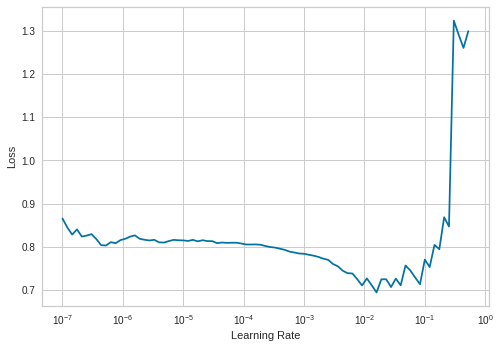

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(10, 5e-3)

epoch,train_loss,valid_loss,accuracy,roc_auc_score,precision_score,recall_score,time
0,0.465865,0.776532,0.830508,0.497449,0.000000,0.000000,00:04


epoch,train_loss,valid_loss,accuracy,roc_auc_score,precision_score,recall_score,time
0,0.323373,0.628975,0.830508,0.497449,0.000000,0.000000,00:04
1,0.212172,0.593734,0.830508,0.502551,0.000000,0.000000,00:04
2,0.205524,0.914700,0.830508,0.497449,0.000000,0.000000,00:04
3,0.190716,0.780756,0.830508,0.502551,0.000000,0.000000,00:04
4,0.167379,0.955354,0.830508,0.502551,0.000000,0.000000,00:04
5,0.095870,0.966577,0.830508,0.502551,0.000000,0.000000,00:04
6,0.040892,1.393632,0.830508,0.502551,0.000000,0.000000,00:04
7,0.021438,1.204639,0.830508,0.502551,0.000000,0.000000,00:04
8,0.017399,1.349500,0.830508,0.502551,0.000000,0.000000,00:04
9,0.004320,1.310108,0.830508,0.502551,0.000000,0.000000,00:04
